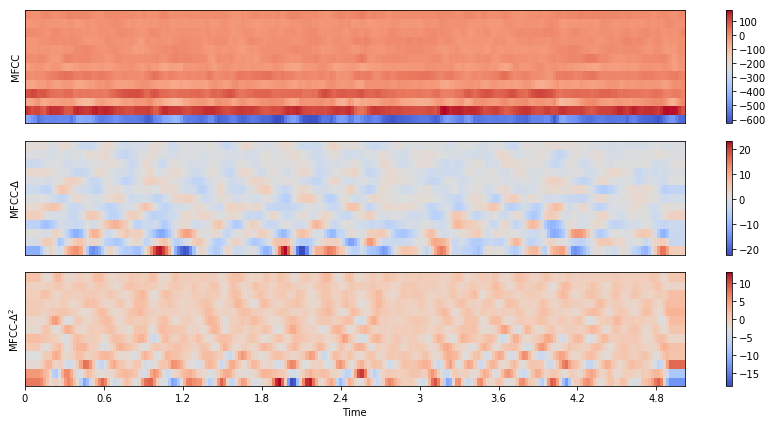

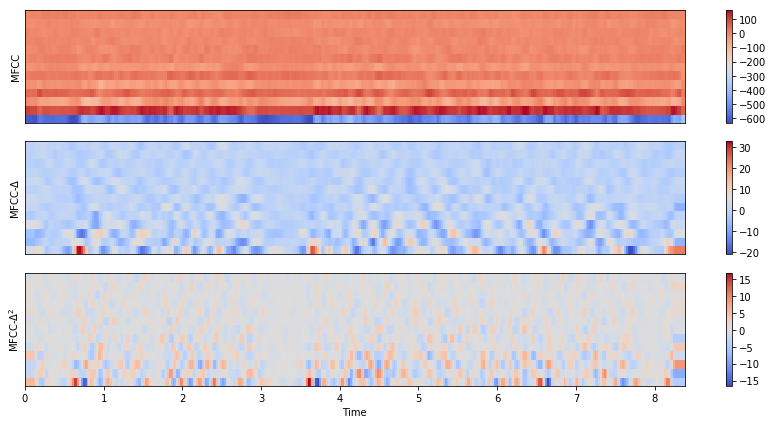

In [4]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import os
for files in os.listdir('./audio'):
    file = '/home/fractaluser/Downloads/mfc/audio'+'/'+files
    y,sr=librosa.load(file)
    S = librosa.feature.melspectrogram(y,sr=sr,n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc  = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    plt.figure(figsize=(12, 6))

    plt.subplot(3,1,1)
    librosa.display.specshow(mfcc)
    plt.ylabel('MFCC')
    plt.colorbar()

    plt.subplot(3,1,2)
    librosa.display.specshow(delta_mfcc)
    plt.ylabel('MFCC-$\Delta$')
    plt.colorbar()

    plt.subplot(3,1,3)
    librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
    plt.ylabel('MFCC-$\Delta^2$')
    plt.colorbar()

    plt.tight_layout()
    M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])
    plt.savefig('mfccimages/'+files.strip('.wav')+'.png')